# Day 08. Exercise 02
# Multiclass classification. One-hot encoding. Random forest

## 0. Imports

In [464]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## 1. Preprocessing

1. Read the file [`checker-submits.csv`](https://drive.google.com/file/d/14voc4fNJZiLEFaZyd8nEG-lQt5JjatYw/view?usp=sharing).
2. Create a dataframe `df` with the columns: `uid`, `labname`, `numTrials`, `hour`, `dayofweek` where `hour` is extracted from the `timestamp` as well as the `dayofweek` (`0` is Monday, `6` is Sunday). We will try to predict the day of the week having data about which user made a commit for which lab at which hour and which try it was.
3. Using `OneHotEncoder()` transform your categorical features, delete from the dataframe the initial columns.
4. Use `StandardScaler()` and scale your continuous features.
5. Save the dataframe as `dayofweek.csv`.
6. Before trying out different algorithms, find out the accuracy of the naive algorithms – the one that predicts everything as the most popular class.

In [465]:
df = pd.read_csv("../data/checker_submits.csv", parse_dates=["timestamp"])
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek
df.drop(["timestamp"], axis=1, inplace=True)
df

,uid,labname,numTrials,hour,dayofweek
0,user_4,project1,1,5,4
1,user_4,project1,2,5,4
2,user_4,project1,3,5,4
3,user_4,project1,4,5,4
4,user_4,project1,5,5,4
...,...,...,...,...,...
1681,user_19,laba06s,9,20,3
1682,user_1,laba06s,6,20,3
1683,user_1,laba06s,7,20,3
1684,user_1,laba06s,8,20,3


In [466]:
encoder = OneHotEncoder()
x = df[["uid", "labname"]]
encoded = encoder.fit_transform(x).toarray()
feature_names = encoder.get_feature_names(["uid", "labname"])
encod_df = pd.DataFrame(encoded, columns=feature_names)
encod_df

,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,uid_user_15,uid_user_16,uid_user_17,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [467]:
df = df.drop(columns=["uid", "labname"])
df = pd.concat([df, encod_df], axis=1)
df


,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,1,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,3,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,4,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,5,5,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,9,20,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,6,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,7,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,8,20,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [468]:
scaler = StandardScaler()
df[["numTrials", "hour"]] = scaler.fit_transform(df[["numTrials", "hour"]])
df

,numTrials,hour,dayofweek,uid_user_0,uid_user_1,uid_user_10,uid_user_11,uid_user_12,uid_user_13,uid_user_14,...,labname_lab02,labname_lab03,labname_lab03s,labname_lab05s,labname_laba04,labname_laba04s,labname_laba05,labname_laba06,labname_laba06s,labname_project1
0,-0.788667,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.756764,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.724861,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.692958,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,-0.661055,-2.562352,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1681,-0.533442,0.945382,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1682,-0.629151,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1683,-0.597248,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1684,-0.565345,0.945382,3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [469]:
df.to_csv("../data/dayofweek.csv", index=False)

In [470]:
accuracy_score(df["dayofweek"], [df["dayofweek"].mode().values] * len(df["dayofweek"]))

0.23487544483985764

## 2. Algorithms

### a. Logreg

1. Train logistic regression, for the baseline model use `random_state=21`, `fit_intercept=False`. 
2. Calculate the accuracy.
3. Write a function that draws the plot (`barh`) taking coefficients of any trained models, names of the features and the number of `top-n` most important features to display.
4. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model.
5. Remember that it is a multiclass classification and `coef_` returns a matrix, to calculate importance for a feature you need to sum all the individual feature importances for all the target values.

In [471]:
model = LogisticRegression(random_state=21, fit_intercept=False, solver="liblinear")
x = df.drop("dayofweek", axis=1)
y = df["dayofweek"]
model.fit(x, y)
predict = model.predict(x)
accuracy_score(y, predict)

0.6215895610913404

In [472]:
importance = abs(model.coef_).sum(axis=0)
top_10_idx = np.argsort(importance)[-10:][::-1]
top_10_importance = importance[top_10_idx]
top_10_features = np.array(x.columns)[top_10_idx]
top_10_features

array(['labname_code_rvw', 'labname_laba05', 'labname_laba04s',
       'labname_laba04', 'labname_lab05s', 'labname_project1',
       'labname_laba06', 'labname_laba06s', 'uid_user_14', 'uid_user_3'],
      dtype=object)

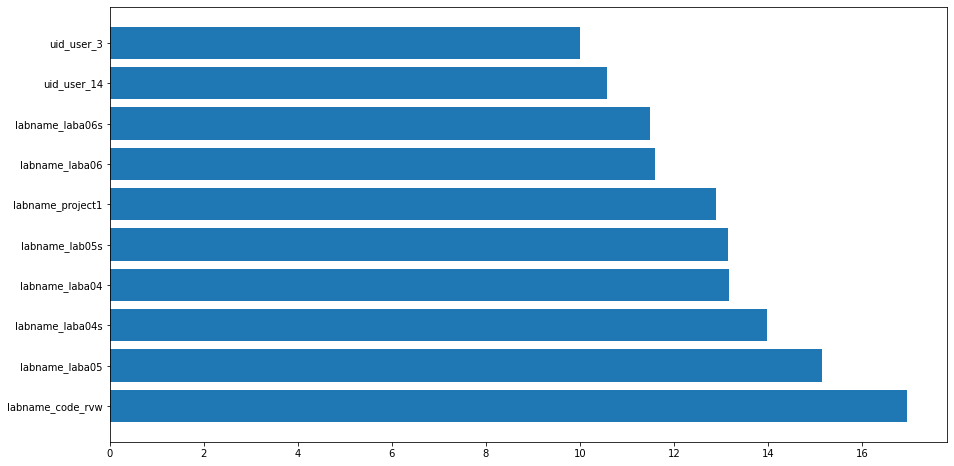

In [473]:
plt.figure(figsize=(15,8))
plt.barh(top_10_features, top_10_importance)
plt.show()

### b. SVC

1. Train a `SVC` model, for the baseline model use parameters `kernel='linear'`, `probability=True`, `random_state=21`. 
2. Try different kernels, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model for the linear kernel *

*By default SVC uses “one vs one” strategy of the classification, thus in `coef_` it returns a matrix. To calculate importance for a feature you need to use [OneVsRestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.multiclass.OneVsRestClassifier.html) over the SVC and sum all the individual feature importances for all the target values.

In [490]:
model = OneVsRestClassifier(SVC(kernel="linear", probability=True, random_state=21))
model.fit(x, y)
predict = model.predict(x)
accuracy_score(y, predict)

0.6120996441281139

In [475]:
model_svc = OneVsRestClassifier(SVC(kernel="poly", probability=True, random_state=21))
model_svc.fit(x, y)
predict_svc = model_svc.predict(x)
accuracy_score(y, predict_svc)

0.8653618030842231

In [476]:
model_svc = OneVsRestClassifier(SVC(kernel="rbf", probability=True, random_state=21))
model_svc.fit(x, y)
predict_svc = model_svc.predict(x)
accuracy_score(y, predict_svc)

0.8641755634638197

In [477]:
importance = abs(model.coef_).sum(axis=0)
top_10_idx = np.argsort(importance)[-10:][::-1]
top_10_importance = importance[top_10_idx]
top_10_features = np.array(x.columns)[top_10_idx]
top_10_features

array(['uid_user_2', 'labname_laba05', 'labname_laba06',
       'labname_laba06s', 'labname_project1', 'uid_user_11', 'uid_user_7',
       'uid_user_12', 'uid_user_13', 'uid_user_10'], dtype=object)

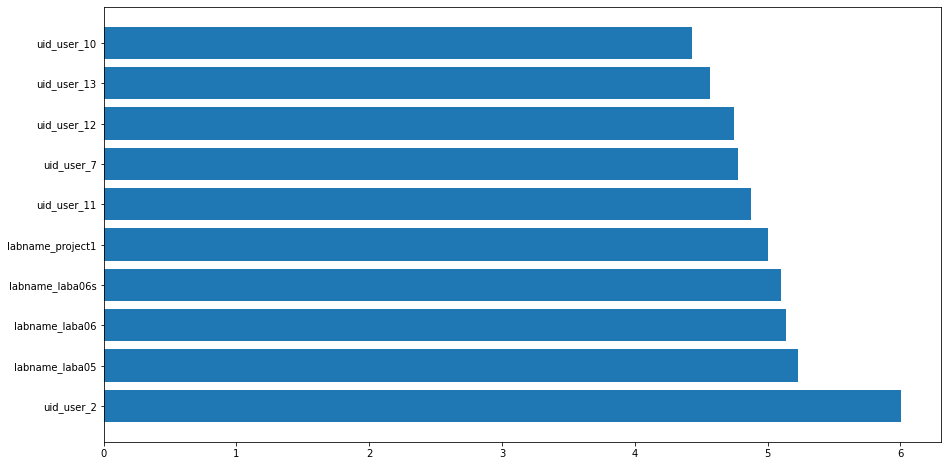

In [478]:
plt.figure(figsize=(15,8))
plt.barh(top_10_features, top_10_importance)
plt.show()

### c. Decision tree

1. Train a `DecisionTreeClassifier` using for the baseline model `max_depth=4`, `random_state=21`. 
2. Try different values of `max_depth`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [479]:
model = DecisionTreeClassifier(max_depth=4, random_state=21)
model.fit(x, y)
predict = model.predict(x)
accuracy_score(y, predict)

0.5516014234875445

In [480]:
model_tree = DecisionTreeClassifier(max_depth=1, random_state=21)
model_tree.fit(x, y)
predict_tree = model_tree.predict(x)
accuracy_score(y, predict_tree)

0.35765124555160144

In [481]:
model_tree = DecisionTreeClassifier(max_depth=10, random_state=21)
model_tree.fit(x, y)
predict_tree = model_tree.predict(x)
accuracy_score(y, predict_tree)

0.8196915776986952

In [482]:
importance = model.feature_importances_
top_10_idx = np.argsort(importance)[-10:][::-1]
top_10_importance = importance[top_10_idx]
top_10_features = np.array(x.columns)[top_10_idx]
top_10_features

array(['labname_project1', 'numTrials', 'uid_user_12', 'labname_laba05',
       'uid_user_2', 'uid_user_14', 'uid_user_3', 'hour',
       'labname_laba06s', 'labname_laba04'], dtype=object)

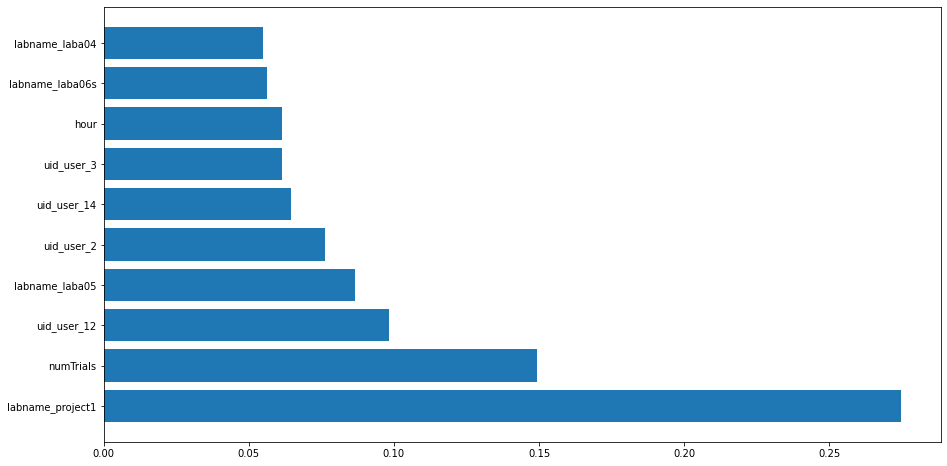

In [483]:
plt.figure(figsize=(15,8))
plt.barh(top_10_features, top_10_importance)
plt.show()

### d. Random forest

In real life forest is a set of trees. The same thing is with machine learning. Random forest is a set of individual decision trees (check the documentation for more details).

1. Train a `RandomForestClassifier` using for the baseline model parameters `n_estimators=100`, `max_depth = 25`, `random_state=21`. 
2. Try different values of `max_depth` and `n_estimators`, calculate the accuracies.
3. Draw a plot (`barh`) for the baseline model with top-10 most important features (absolute value) for the trained model using the written function.

In [484]:
model = RandomForestClassifier(n_estimators=100, max_depth=25, random_state=21)
model.fit(x, y)
predict = model.predict(x)
accuracy_score(y, predict)

1.0

In [485]:
model_forest = RandomForestClassifier(n_estimators=1000, max_depth=1, random_state=21)
model_forest.fit(x, y)
predict_forest = model_forest.predict(x)
accuracy_score(y, predict_forest)

0.38730723606168443

In [486]:
model_forest = RandomForestClassifier(n_estimators=7, max_depth=50, random_state=21)
model_forest.fit(x, y)
predict_forest = model_forest.predict(x)
accuracy_score(y, predict_forest)

0.9958481613285883

In [487]:
importance = model.feature_importances_
top_10_idx = np.argsort(importance)[-10:][::-1]
top_10_importance = importance[top_10_idx]
top_10_features = np.array(x.columns)[top_10_idx]
top_10_features

array(['numTrials', 'hour', 'labname_project1', 'labname_laba05',
       'uid_user_26', 'uid_user_2', 'uid_user_14', 'uid_user_3',
       'uid_user_25', 'uid_user_29'], dtype=object)

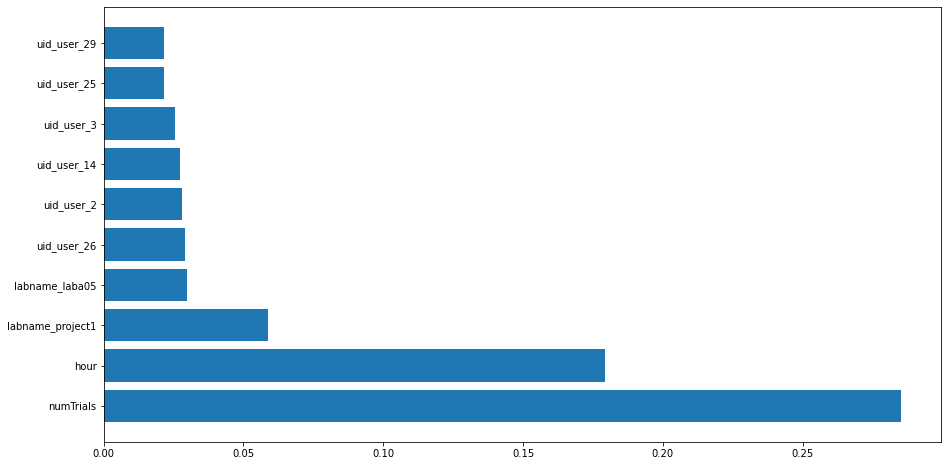

In [488]:
plt.figure(figsize=(15,8))
plt.barh(top_10_features, top_10_importance)
plt.show()